In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [4]:
df = pd.read_csv('untitled4.csv')
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 117.3+ KB


In [6]:
df.isna().sum() #the same as non-null count in .info()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [7]:
df.describe()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max              10.000000              6.000000   

       Physical_Activity_Hours_Per_Day          GPA  
count                       2000.00000  2000.000000  
mean                           4.32830     3.115960  
std                            2.51411     0.298674  
min                            0.00000     2.240000  
25%                            2.40000     2.900000  
50%                            4.10000     3.110000  
75%                            6.10000     3.330000  
max                           13.00000     4.000000

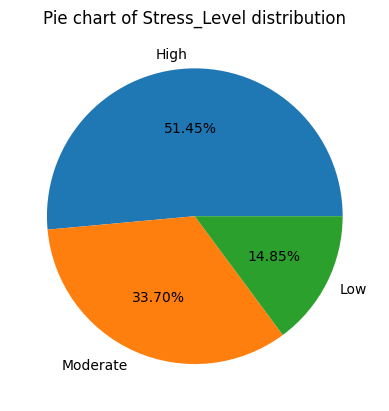

In [129]:
labels = ['High', 'Moderate', 'Low']
low_stress = df[df.Stress_Level == 'Low'].count()

#sizes = df.groupby('Stress_Level')['Stress_Level'].value_counts() #not good choise

low = df[df['Stress_Level'] == 'Low']['Stress_Level'].count()
moderate = df[df['Stress_Level'] == 'Moderate']['Stress_Level'].count()
high = df[df['Stress_Level'] == 'High']['Stress_Level'].count()

sizes = [high, moderate, low]

fig, ax = plt.subplots()
plt.title('Pie chart of Stress_Level distribution')

ax.pie(sizes, labels=labels, autopct='%2.2f%%')
plt.show()

Univariate analysis

In [ ]:
sns.histplot(df['Study_Hours_Per_Day'])
plt.title('Study_Hours_Per_Day')
plt.show()

In [ ]:
sns.histplot(data=df, x=df['Study_Hours_Per_Day'], hue='Stress_Level', alpha=0.5, kde=True)
plt.title('Study_Hours_Per_Day')
plt.show()

This is gona be too long and boring to do all plots so i will write function to make 4 plots at ones: hist and violin

In [91]:
def draw_plots(df, column=None):
    '''draw 3 plots: histplot, boxplot, swarmplot?'''
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    fig.suptitle(f'Distribution of {column} by stress level', fontsize=20)
    plt.subplots_adjust(hspace = 0.4, wspace=0.3)

    order = ['Low','Moderate','High']
    
    sns.histplot(ax=ax[0,0], data=df, x=column)
    ax[0,0].set_title(f'Distribution of the {column}')
    
    sns.histplot(ax=ax[1,0], data=df, x=df[column], hue='Stress_Level', hue_order=order, alpha=0.5, kde=True)
    ax[1,0].set_title(f'Distribution of the {column} split by sterss level')
    
    sns.violinplot(ax=ax[0,1], data=df, x=column)
    ax[0,1].set_title(f'KDE of the {column}')
                  
    sns.violinplot(ax=ax[1,1], data=df, x=column, hue='Stress_Level', hue_order=order)
    ax[1,1].set_title(f'KDE of the {column} split by sterss level')

   #fig.delaxes(ax[1,1])
    
    plt.show()


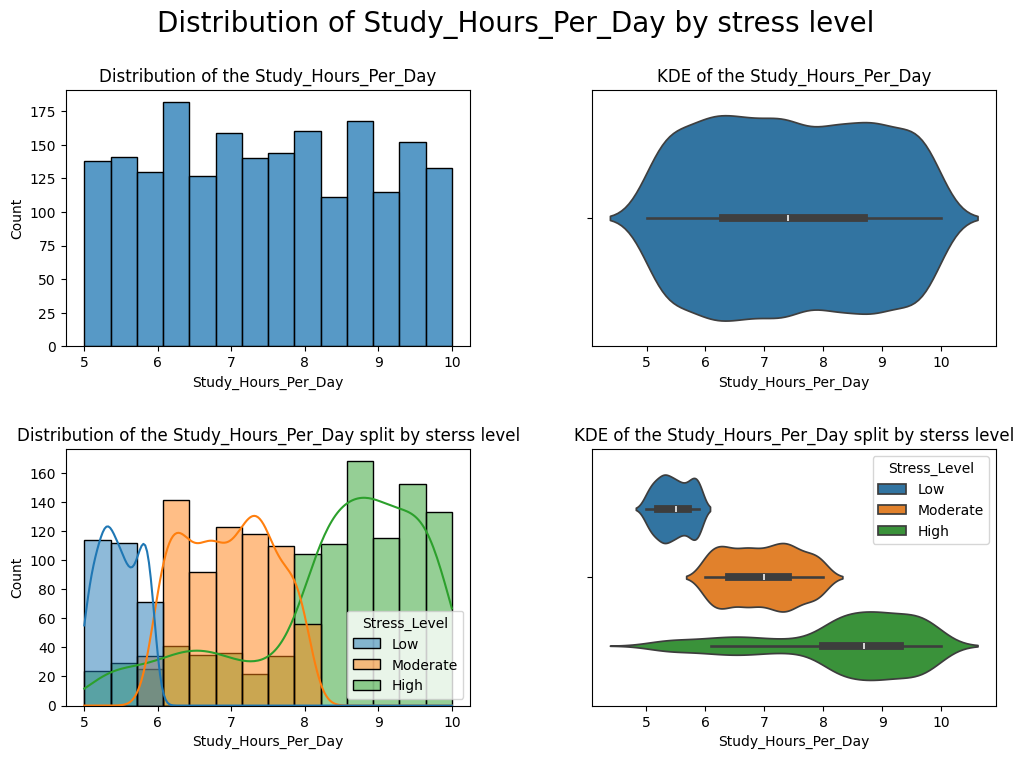

In [92]:
draw_plots(df, 'Study_Hours_Per_Day')

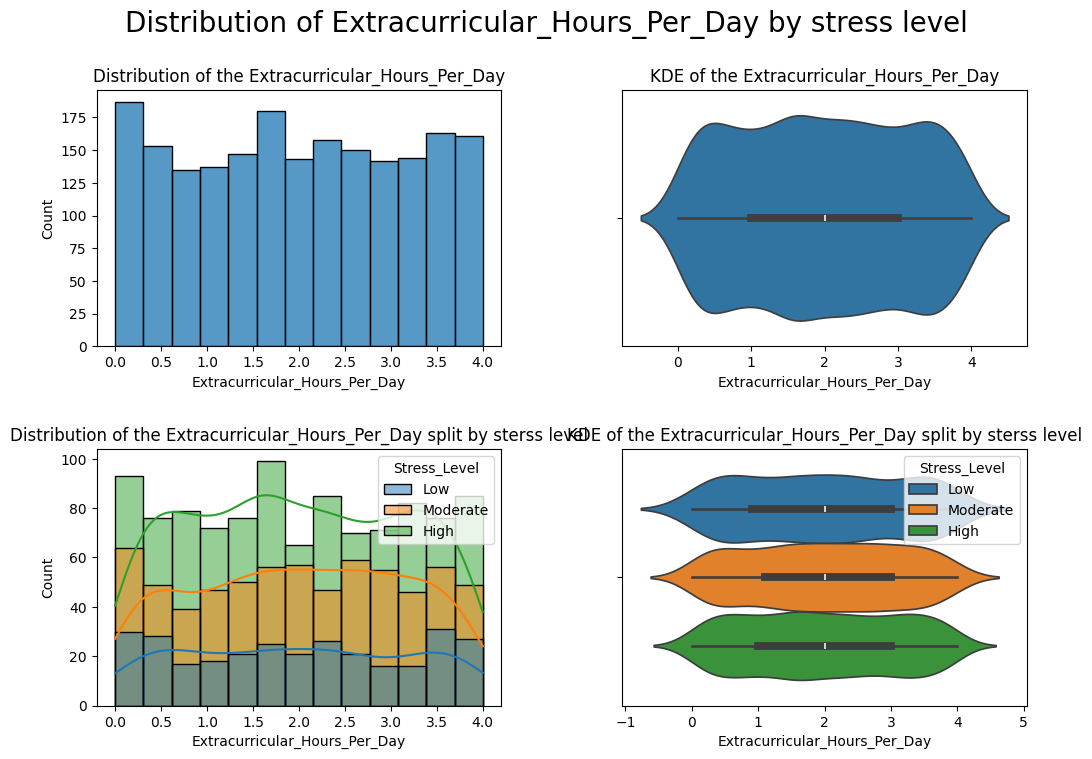

In [93]:
draw_plots(df, 'Extracurricular_Hours_Per_Day')

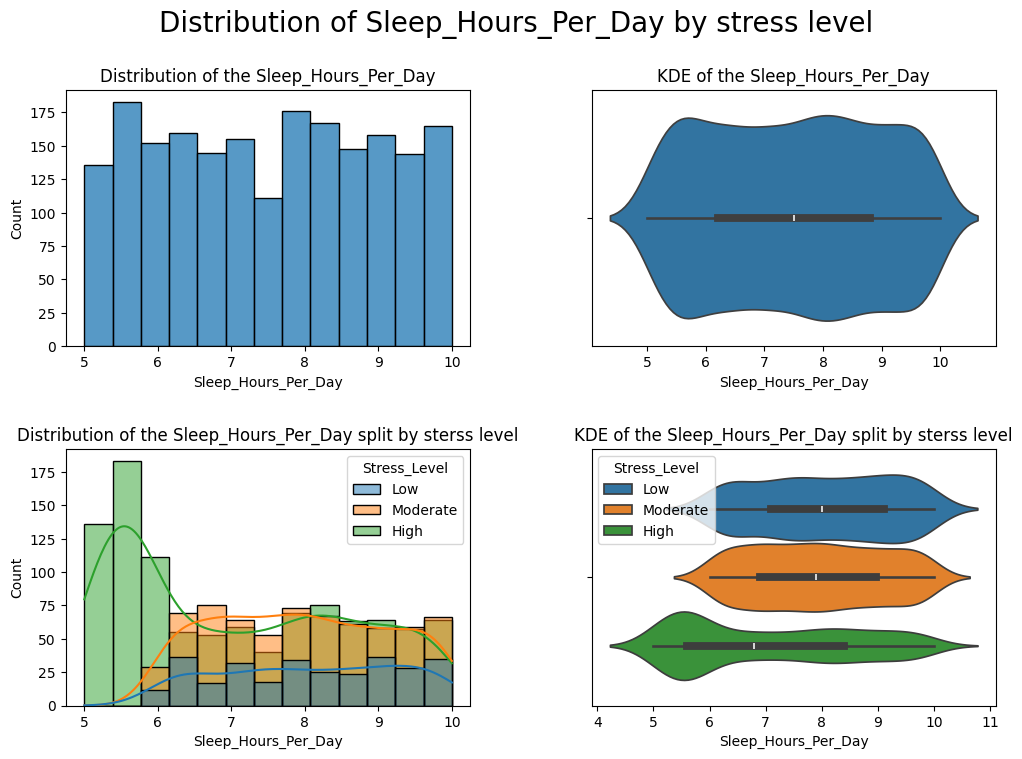

In [94]:
draw_plots(df, 'Sleep_Hours_Per_Day')

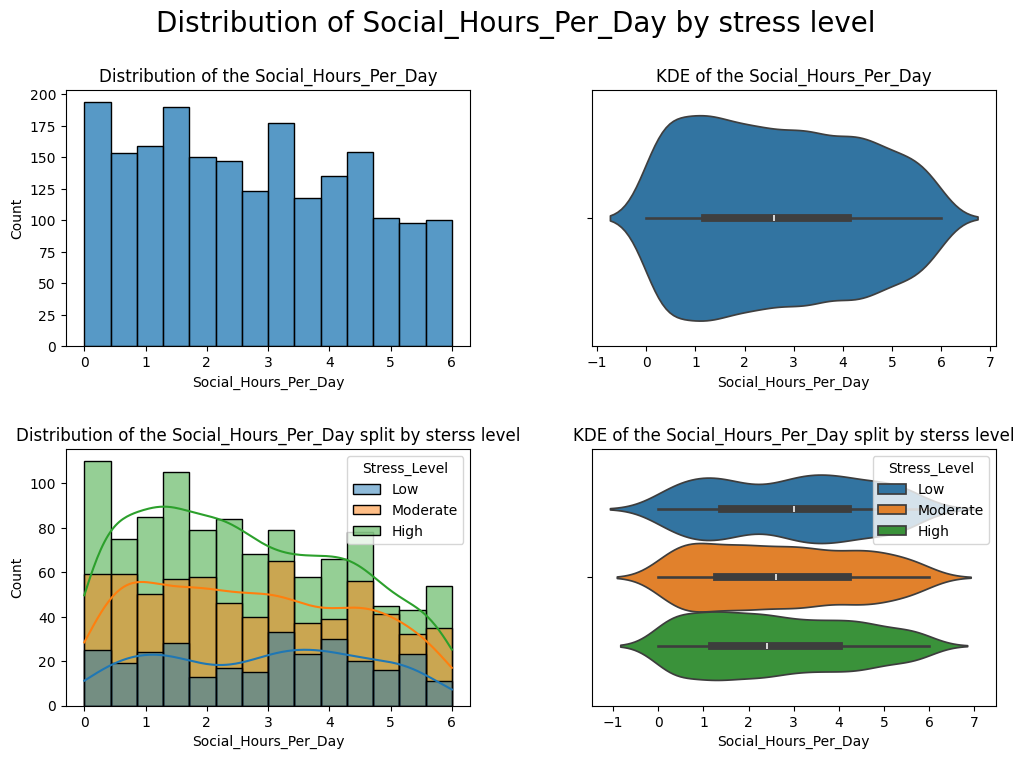

In [96]:
draw_plots(df, 'Social_Hours_Per_Day')

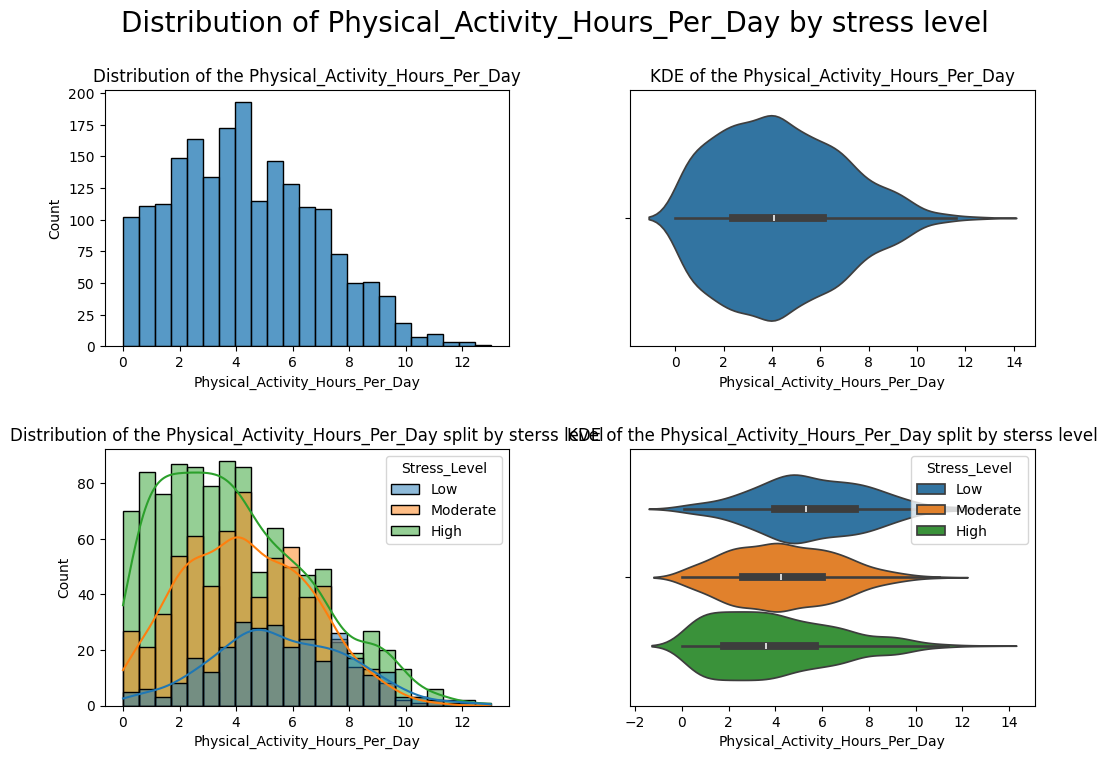

In [97]:
draw_plots(df, 'Physical_Activity_Hours_Per_Day')

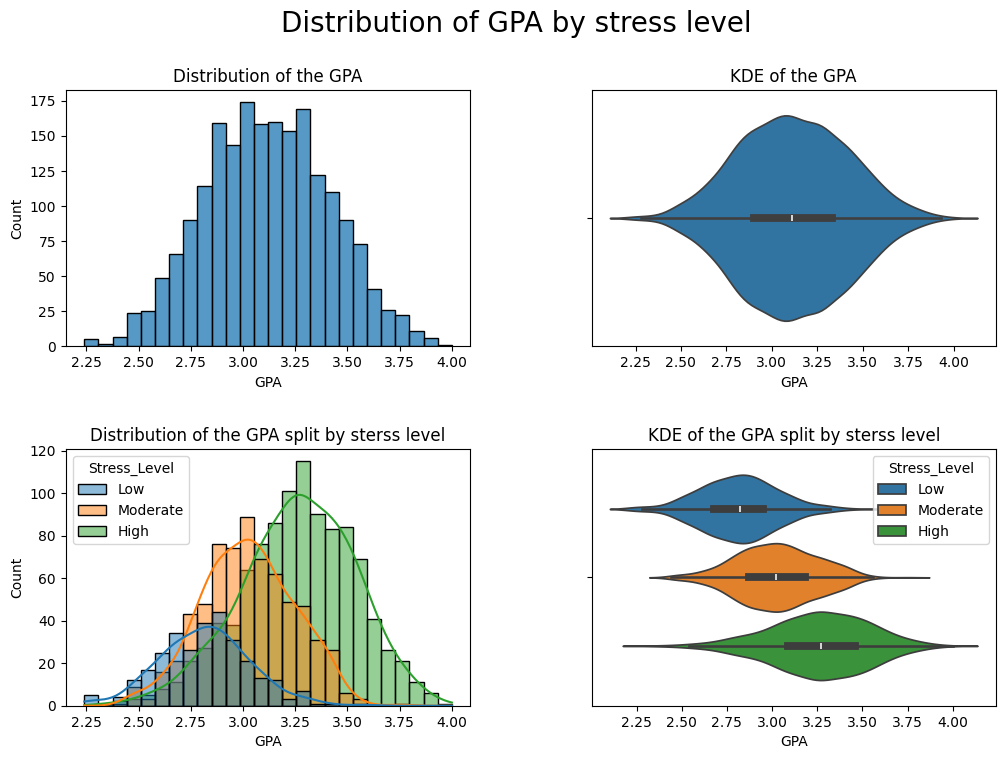

In [130]:
draw_plots(df, 'GPA')

Bivariate analysis

In [99]:
def drow_plots_by_2columns(df, column_1, column_2):

    pass
    

Multivariate analysis

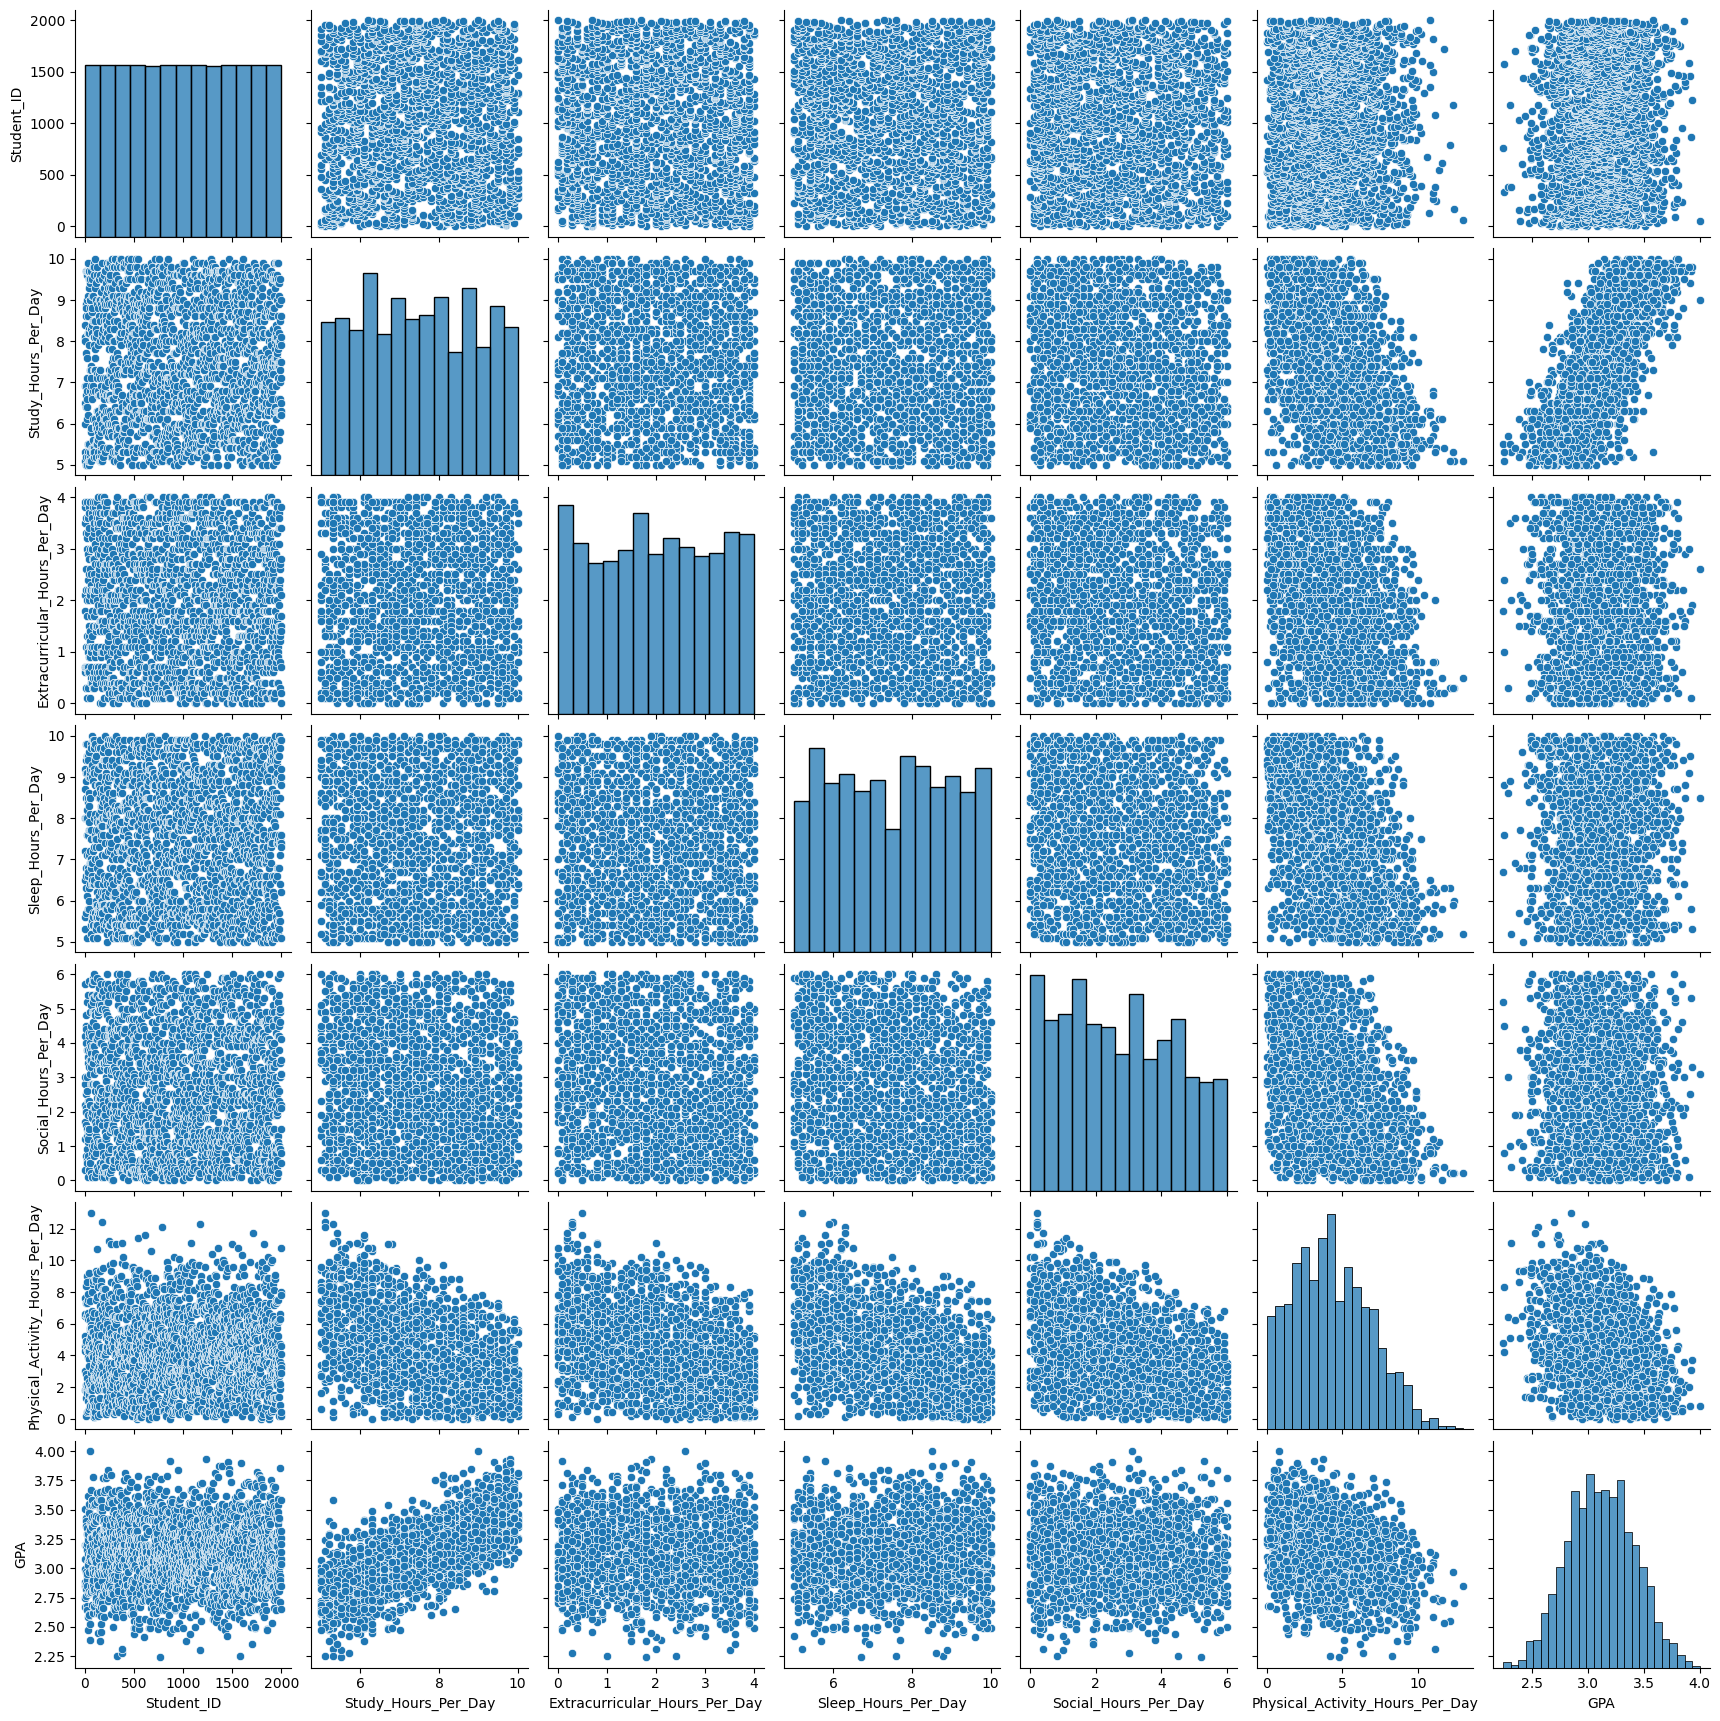

In [132]:
sns.pairplot(df)
plt.show()

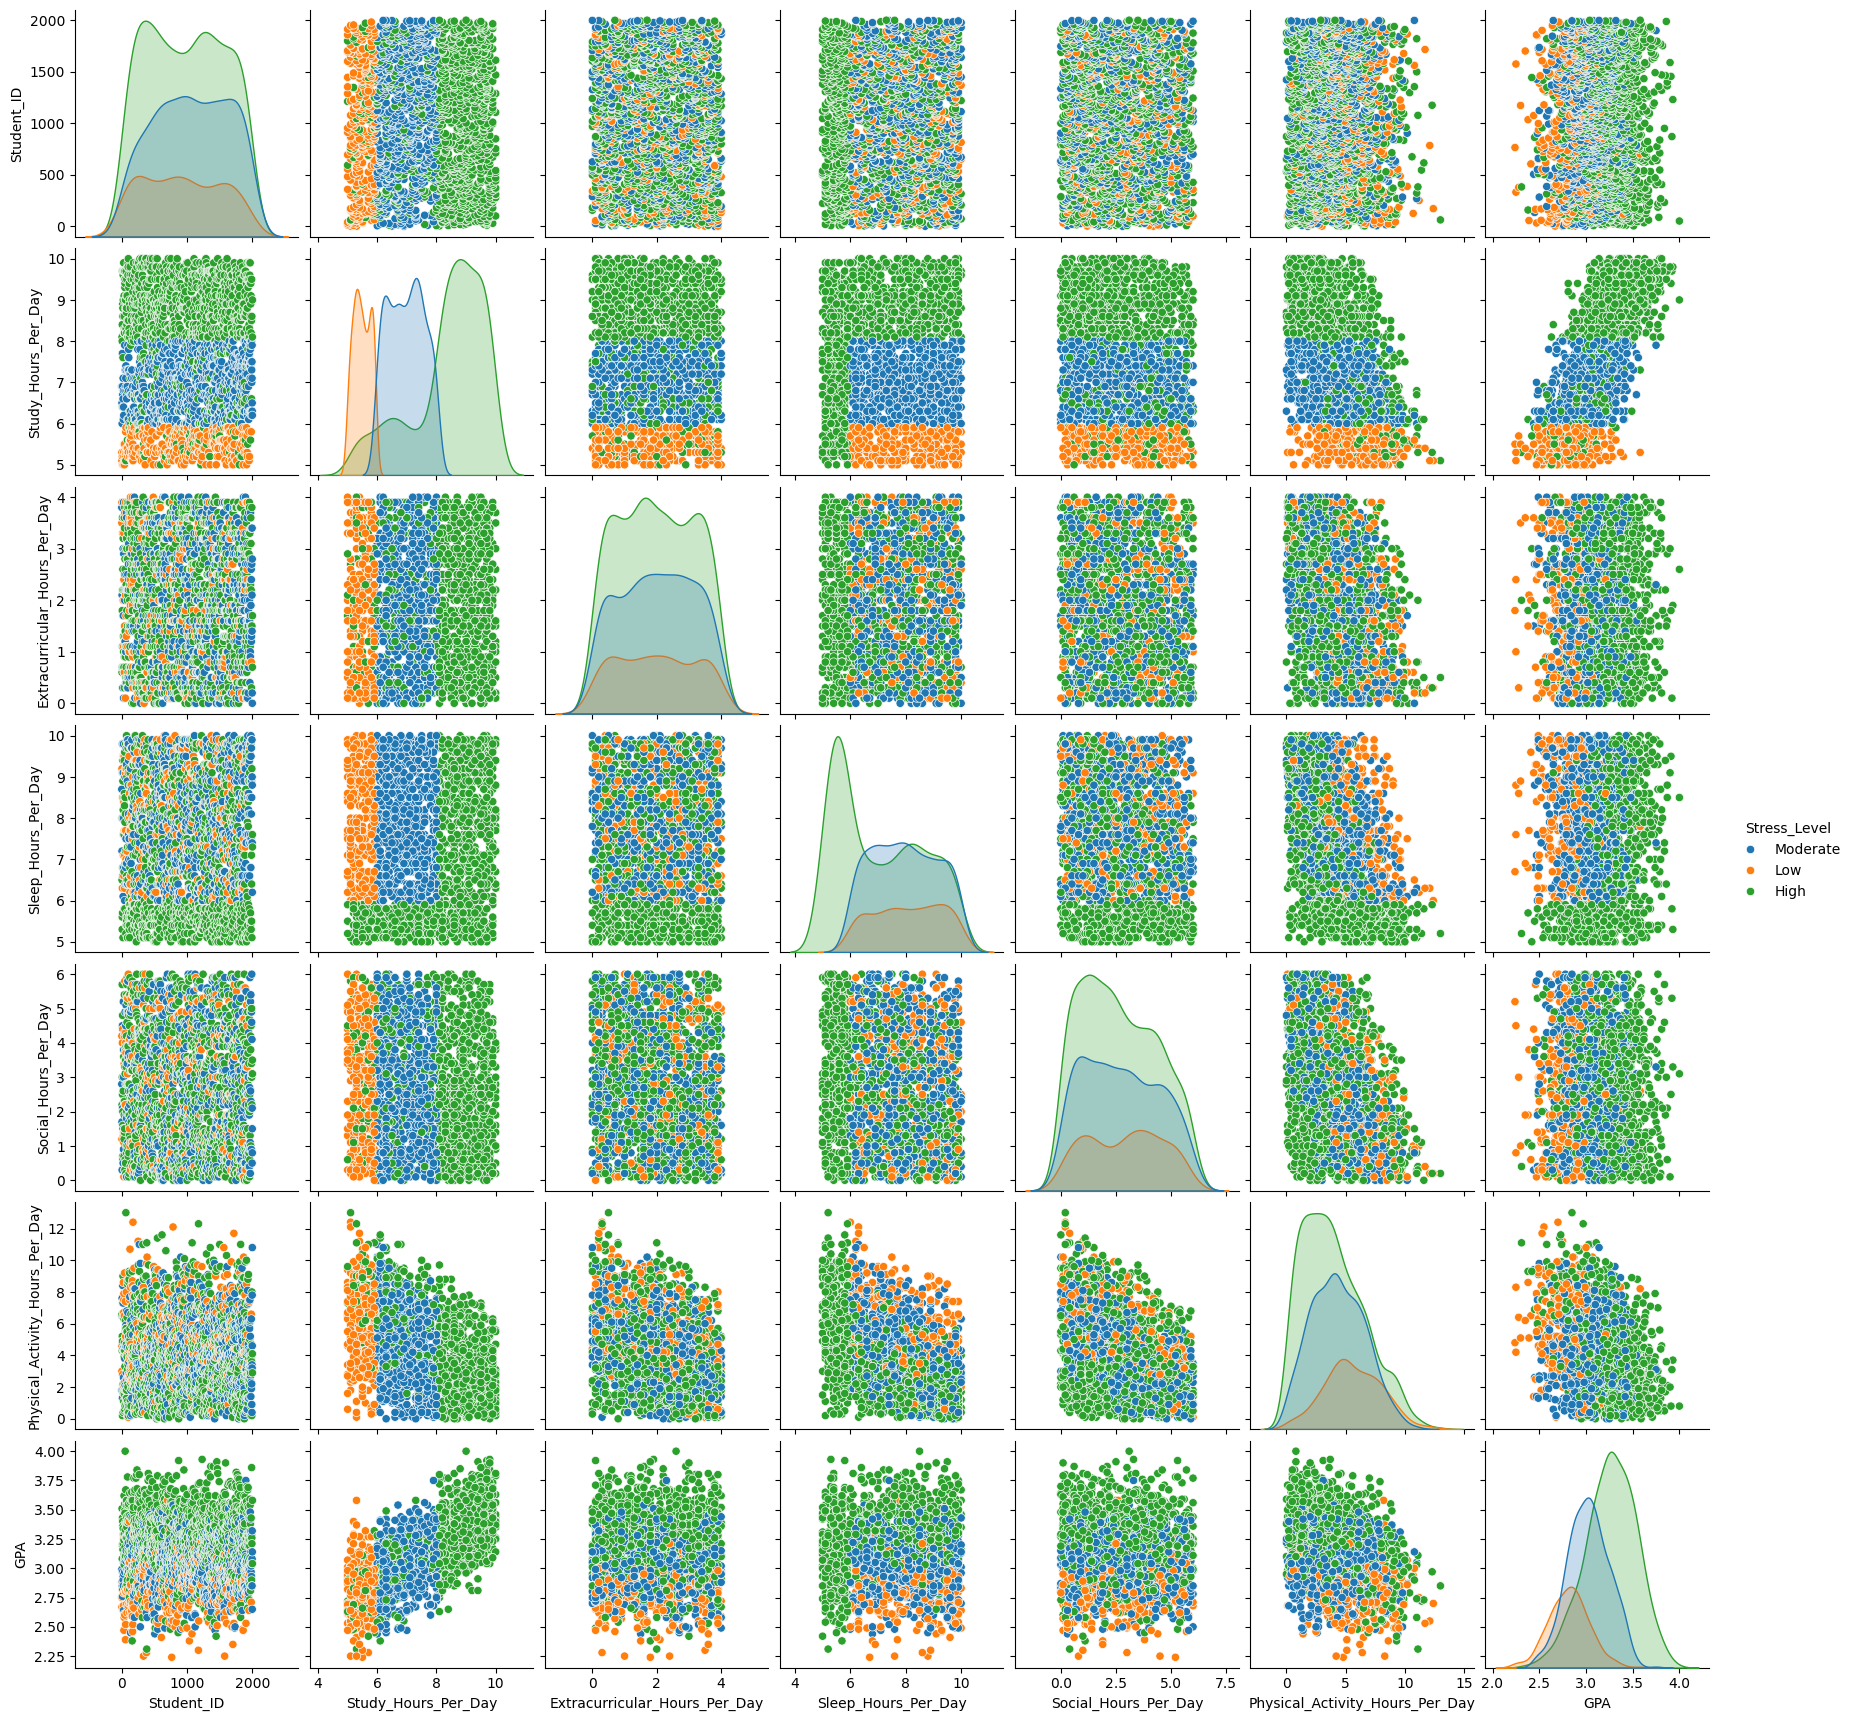

In [137]:
sns.pairplot(df, hue='Stress_Level')
plt.show()

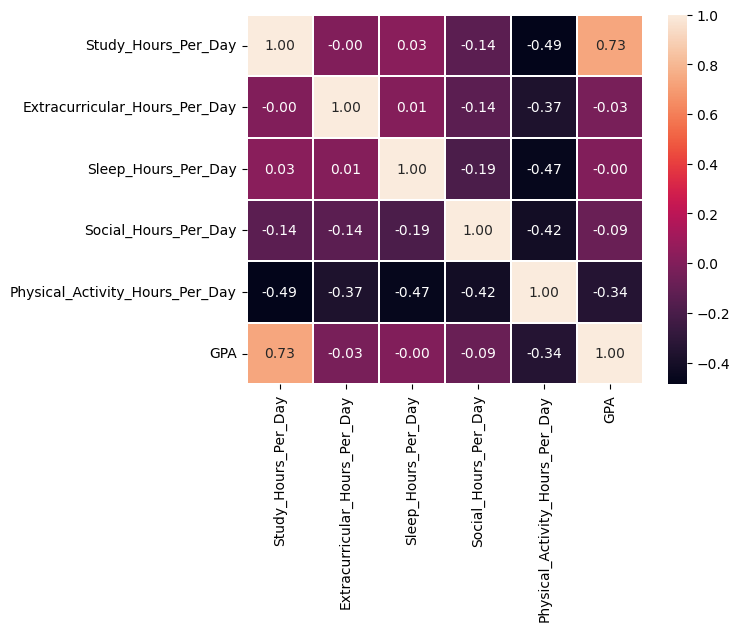

In [148]:
corr_df  = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
               'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']].corr()

sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=.2)
plt.show()


its a good idea to look at 'Study_Hours_Per_Day' vs 'GPA' and 'Physical_Activity_Hours_Per_Day' vs 'GPA'

'Physical_Activity_Hours_Per_Day' vs all 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day' - not good idea because its just students daily activity (how they spend time during the day) if they spend more time for 1 activity they have less for others. Also 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day' have 0 correlation with 'GPA'

Bivariate analysis

In [283]:
def gpa_achive(df, col):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    plt.subplots_adjust(wspace=0.3)
    
    sns.regplot(ax=ax[0], data=df, x=col, y="GPA", line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
    sns.scatterplot(ax=ax[1], data=df, x=col, y="GPA", hue='Stress_Level', alpha=0.7)
        
    plt.show()

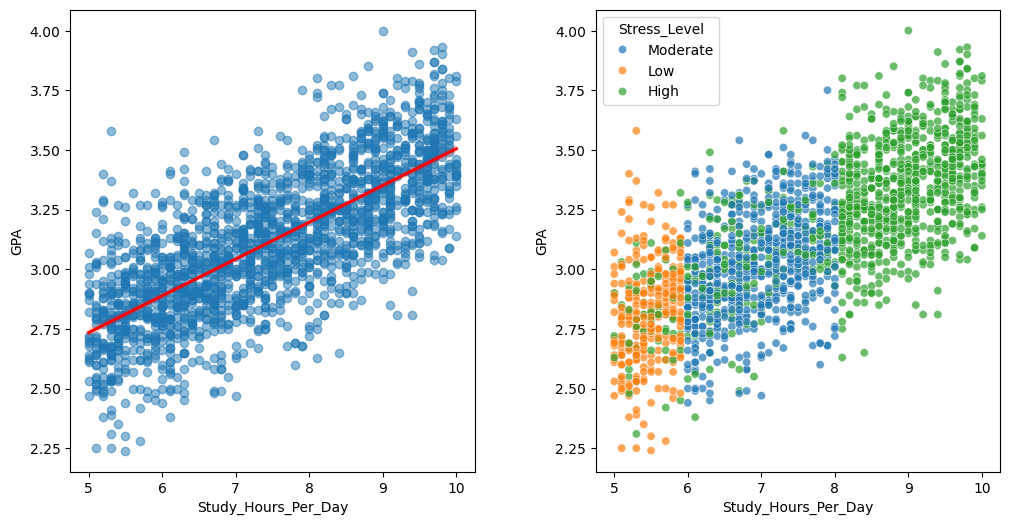

In [284]:
gpa_achive(df, 'Study_Hours_Per_Day')

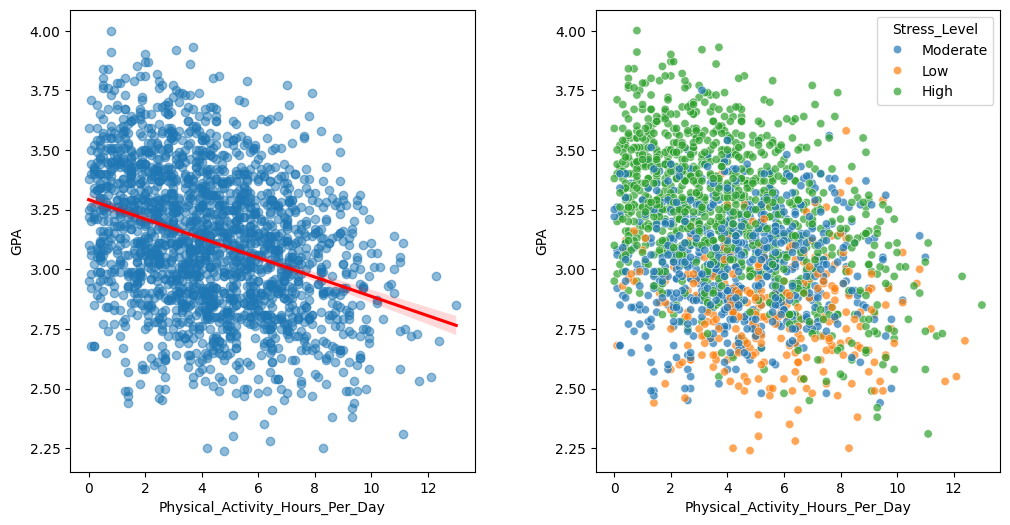

In [285]:
gpa_achive(df, 'Physical_Activity_Hours_Per_Day')

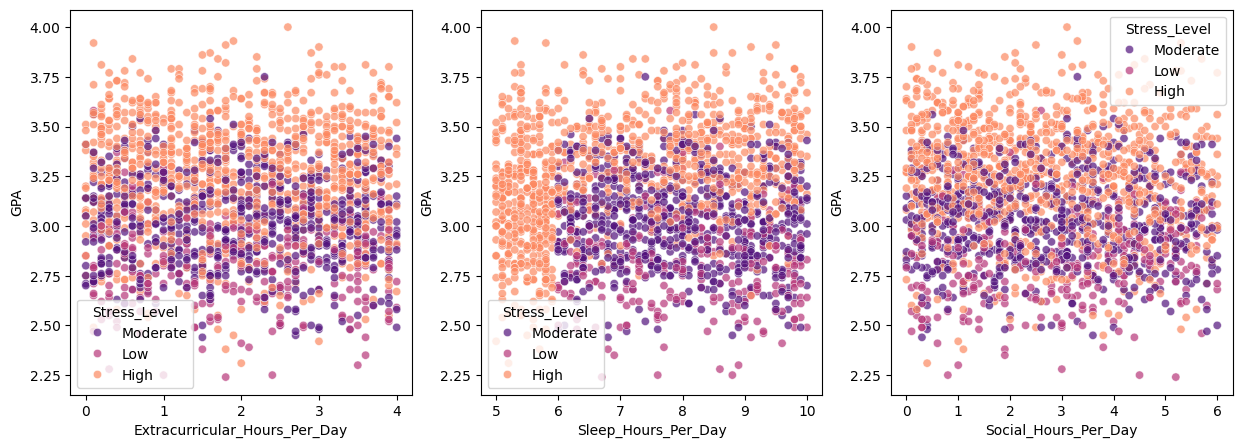

In [287]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.scatterplot(ax=ax[0], x='Extracurricular_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette='magma', alpha=0.7)
sns.scatterplot(ax=ax[1], x='Sleep_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette='magma', alpha=0.7)
sns.scatterplot(ax=ax[2], x='Social_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette='magma', alpha=0.7)

plt.show()

In [288]:
def extra_hours_activity(df, col_1, col_2):
    '''useless function, just show regplot with 2 columns'''
    sns.regplot(data=df, x=col_1, y=col_2, line_kws = {'color':'red'}, scatter_kws={'alpha':0.5})
    plt.suptitle(f'Correlation between {col_1} and {col_2}')
    plt.show()